Plot population of all state in one plot

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

population_data = pd.read_csv("population_state.csv")
population_data.head()

,state,date,sex,age,ethnicity,population
0,Johor,1970-01-01,both,overall,overall,1325.6
1,Johor,1970-01-01,both,0-4,overall,210.1
2,Johor,1970-01-01,both,5-9,overall,215.7
3,Johor,1970-01-01,both,10-14,overall,192.2
4,Johor,1970-01-01,both,15-19,overall,152.8


In [13]:
population_data = population_data[(population_data["age"] == "overall") &
                                          (population_data["ethnicity"] == "overall") &
                                          (population_data["sex"] == "both")]
population_data.head()

,state,date,sex,age,ethnicity,population
0,Johor,1970-01-01,both,overall,overall,1325.6
48,Johor,1971-01-01,both,overall,overall,1355.4
96,Johor,1972-01-01,both,overall,overall,1385.3
144,Johor,1973-01-01,both,overall,overall,1414.5
192,Johor,1974-01-01,both,overall,overall,1444.4


In [14]:
population_data["year"] = pd.to_datetime(population_data["date"]).dt.year
population_data.head()

,state,date,sex,age,ethnicity,population,year
0,Johor,1970-01-01,both,overall,overall,1325.6,1970
48,Johor,1971-01-01,both,overall,overall,1355.4,1971
96,Johor,1972-01-01,both,overall,overall,1385.3,1972
144,Johor,1973-01-01,both,overall,overall,1414.5,1973
192,Johor,1974-01-01,both,overall,overall,1444.4,1974


Text(0.5, -0.05, 'Note 1: In 1980, Kuala Lumpur gained its own census count.\nNote 2: In 2010, Putrajaya gained its own census count.\nNote 3: In 1991, Labuan gained its own census\nNote 4: Due to COVID-19 pandemic, intercensal estimation in 2020 resulted in spikes and losses in 2020 and 2021.\n')

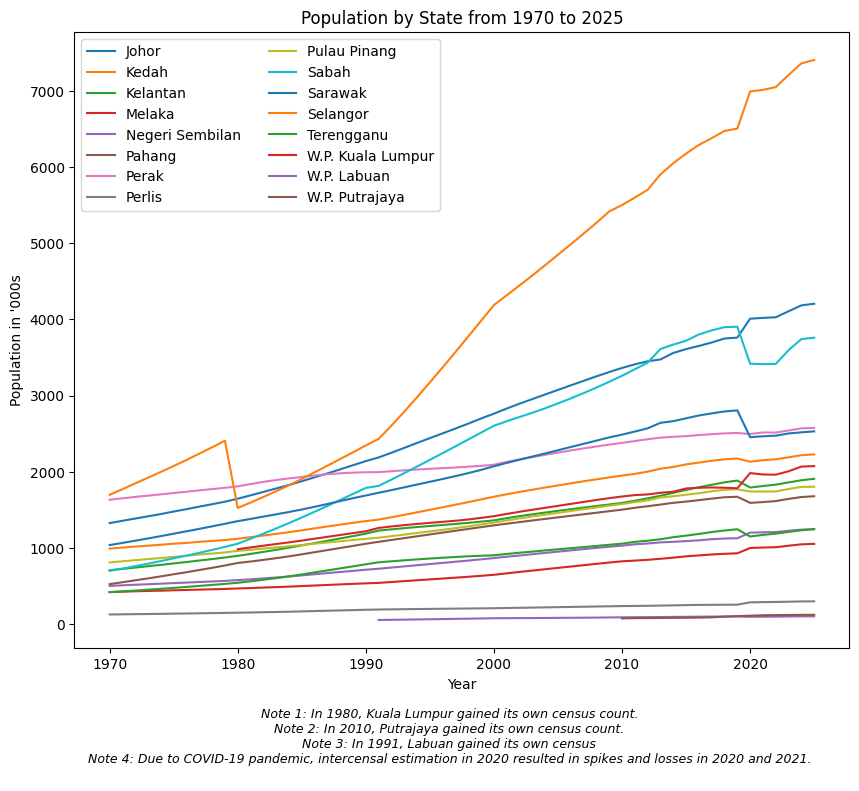

In [15]:
fig, ax = plt.subplots(figsize = (10, 8))
for states in population_data["state"].unique():
    state_data = population_data[population_data["state"] == states]
    ax.plot("year", "population", label = states, data= state_data)


ax.set(xlabel= "Year", ylabel= "Population in '000s", title= "Population by State from 1970 to 2025")
ax.legend(ncols = 2)

plt.figtext(
    0.5, -0.05, 
    "Note 1: In 1980, Kuala Lumpur gained its own census count.\n" + "Note 2: In 2010, Putrajaya gained its own census count.\n" +
    "Note 3: In 1991, Labuan gained its own census\n" +  
    "Note 4: Due to COVID-19 pandemic, intercensal estimation in 2020 resulted in spikes and losses in 2020 and 2021.\n",
    wrap=True, ha='center', fontsize=9, style='italic'
)

In [16]:
grouped = population_data.pivot_table("population", index = "state",
                                         columns = ["year"], aggfunc="sum")
grouped

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
state,,,,,,,,,,,,,,,,,,,,,
Johor,1325.6,1355.4,1385.3,1414.5,1444.4,1477.0,1508.4,1541.9,1573.4,1606.4,...,3651.8,3697.0,3749.4,3761.2,4009.7,4020.0,4028.3,4107.2,4184.4,4205.9
Kedah,989.5,1003.9,1017.3,1029.0,1041.1,1054.9,1065.4,1079.8,1090.9,1103.4,...,2119.7,2143.9,2163.0,2173.7,2131.4,2151.7,2163.1,2189.3,2217.1,2228.0
Kelantan,707.3,723.6,741.1,759.5,776.8,796.1,814.1,834.2,852.5,873.7,...,1796.7,1829.0,1860.5,1883.8,1792.5,1812.3,1830.6,1859.8,1887.9,1907.7
Melaka,419.4,424.9,429.9,434.2,438.1,443.1,447.3,452.1,456.2,460.8,...,901.1,913.1,922.4,928.4,998.4,1004.5,1008.6,1028.3,1046.7,1052.5
Negeri Sembilan,500.4,508.2,515.9,522.8,530.0,537.6,544.3,551.8,558.7,566.4,...,1099.3,1114.0,1122.9,1126.2,1200.0,1204.2,1207.9,1224.9,1239.5,1244.6
Pahang,523.8,548.4,574.0,599.3,626.0,653.4,680.4,709.5,738.2,768.4,...,1626.7,1647.0,1664.7,1671.4,1591.3,1601.5,1614.3,1643.2,1667.7,1678.2
Perak,1631.5,1650.9,1669.3,1686.0,1702.7,1720.9,1736.7,1755.6,1771.5,1789.1,...,2482.1,2493.2,2503.5,2508.8,2496.0,2515.8,2514.4,2541.2,2569.4,2574.9
Perlis,125.5,127.4,129.7,131.7,133.8,136.2,138.3,141.0,143.2,145.8,...,251.0,252.0,253.5,254.0,284.9,287.6,289.8,293.1,296.8,297.8
Pulau Pinang,808.6,823.7,838.9,852.9,866.7,881.7,896.4,912.2,925.7,940.4,...,1717.7,1744.1,1762.8,1768.8,1740.4,1740.0,1740.9,1772.6,1800.5,1803.3


In [17]:
grouped_prop = grouped / grouped.sum()
grouped_prop

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
state,,,,,,,,,,,,,,,,,,,,,
Johor,0.121817,0.121456,0.121078,0.120693,0.120356,0.120078,0.119827,0.119517,0.119194,0.118831,...,0.115441,0.115450,0.115785,0.115648,0.123576,0.123402,0.123196,0.122963,0.122882,0.122865
Kedah,0.090931,0.089958,0.088914,0.087800,0.086750,0.085762,0.084635,0.083698,0.082642,0.081622,...,0.067008,0.066950,0.066796,0.066836,0.065688,0.066051,0.066153,0.065544,0.065109,0.065086
Kelantan,0.064998,0.064841,0.064774,0.064805,0.064727,0.064722,0.064672,0.064661,0.064582,0.064630,...,0.056798,0.057116,0.057454,0.057922,0.055243,0.055632,0.055985,0.055680,0.055441,0.055729
Melaka,0.038541,0.038075,0.037574,0.037048,0.036505,0.036024,0.035534,0.035044,0.034560,0.034087,...,0.028486,0.028514,0.028485,0.028546,0.030770,0.030835,0.030846,0.030786,0.030738,0.030746
Negeri Sembilan,0.045985,0.045539,0.045091,0.044608,0.044163,0.043706,0.043239,0.042772,0.042325,0.041898,...,0.034751,0.034788,0.034676,0.034628,0.036983,0.036965,0.036941,0.036672,0.036400,0.036358
Pahang,0.048135,0.049142,0.050169,0.051136,0.052162,0.053121,0.054051,0.054995,0.055923,0.056841,...,0.051423,0.051433,0.051408,0.051392,0.049043,0.049161,0.049370,0.049195,0.048975,0.049025
Perak,0.149928,0.147935,0.145900,0.143859,0.141879,0.139907,0.137964,0.136081,0.134201,0.132346,...,0.078465,0.077858,0.077311,0.077140,0.076925,0.077228,0.076897,0.076080,0.075455,0.075220
Perlis,0.011533,0.011416,0.011336,0.011237,0.011149,0.011073,0.010987,0.010929,0.010848,0.010785,...,0.007935,0.007869,0.007828,0.007810,0.008780,0.008828,0.008863,0.008775,0.008716,0.008700
Pulau Pinang,0.074307,0.073811,0.073321,0.072774,0.072218,0.071681,0.071210,0.070707,0.070127,0.069564,...,0.054300,0.054465,0.054437,0.054386,0.053638,0.053413,0.053241,0.053069,0.052875,0.052679


Sanity Check

In [18]:
grouped_prop.sum()

year
1970    1.0
1971    1.0
1972    1.0
1973    1.0
1974    1.0
1975    1.0
1976    1.0
1977    1.0
1978    1.0
1979    1.0
1980    1.0
1981    1.0
1982    1.0
1983    1.0
1984    1.0
1985    1.0
1986    1.0
1987    1.0
1988    1.0
1989    1.0
1990    1.0
1991    1.0
1992    1.0
1993    1.0
1994    1.0
1995    1.0
1996    1.0
1997    1.0
1998    1.0
1999    1.0
2000    1.0
2001    1.0
2002    1.0
2003    1.0
2004    1.0
2005    1.0
2006    1.0
2007    1.0
2008    1.0
2009    1.0
2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
2018    1.0
2019    1.0
2020    1.0
2021    1.0
2022    1.0
2023    1.0
2024    1.0
2025    1.0
dtype: float64

In [19]:
grouped_prop = grouped_prop.T
grouped_prop

state,Johor,Kedah,Kelantan,Melaka,Negeri Sembilan,Pahang,Perak,Perlis,Pulau Pinang,Sabah,Sarawak,Selangor,Terengganu,W.P. Kuala Lumpur,W.P. Labuan,W.P. Putrajaya
year,,,,,,,,,,,,,,,,
1970,0.121817,0.090931,0.064998,0.038541,0.045985,0.048135,0.149928,0.011533,0.074307,0.064152,0.095296,0.155892,0.038486,NaN,NaN,NaN
1971,0.121456,0.089958,0.064841,0.038075,0.045539,0.049142,0.147935,0.011416,0.073811,0.065244,0.095451,0.158688,0.038442,NaN,NaN,NaN
1972,0.121078,0.088914,0.064774,0.037574,0.045091,0.050169,0.145900,0.011336,0.073321,0.066382,0.095644,0.161405,0.038413,NaN,NaN,NaN
1973,0.120693,0.087800,0.064805,0.037048,0.044608,0.051136,0.143859,0.011237,0.072774,0.067612,0.095915,0.164030,0.038482,NaN,NaN,NaN
1974,0.120356,0.086750,0.064727,0.036505,0.044163,0.052162,0.141879,0.011149,0.072218,0.068902,0.096216,0.166476,0.038496,NaN,NaN,NaN
1975,0.120078,0.085762,0.064722,0.036024,0.043706,0.053121,0.139907,0.011073,0.071681,0.070161,0.096437,0.168719,0.038609,NaN,NaN,NaN
1976,0.119827,0.084635,0.064672,0.035534,0.043239,0.054051,0.137964,0.010987,0.071210,0.071345,0.096718,0.171138,0.038679,NaN,NaN,NaN
1977,0.119517,0.083698,0.064661,0.035044,0.042772,0.054995,0.136081,0.010929,0.070707,0.072459,0.096860,0.173450,0.038826,NaN,NaN,NaN
1978,0.119194,0.082642,0.064582,0.034560,0.042325,0.055923,0.134201,0.010848,0.070127,0.073726,0.097157,0.175822,0.038893,NaN,NaN,NaN


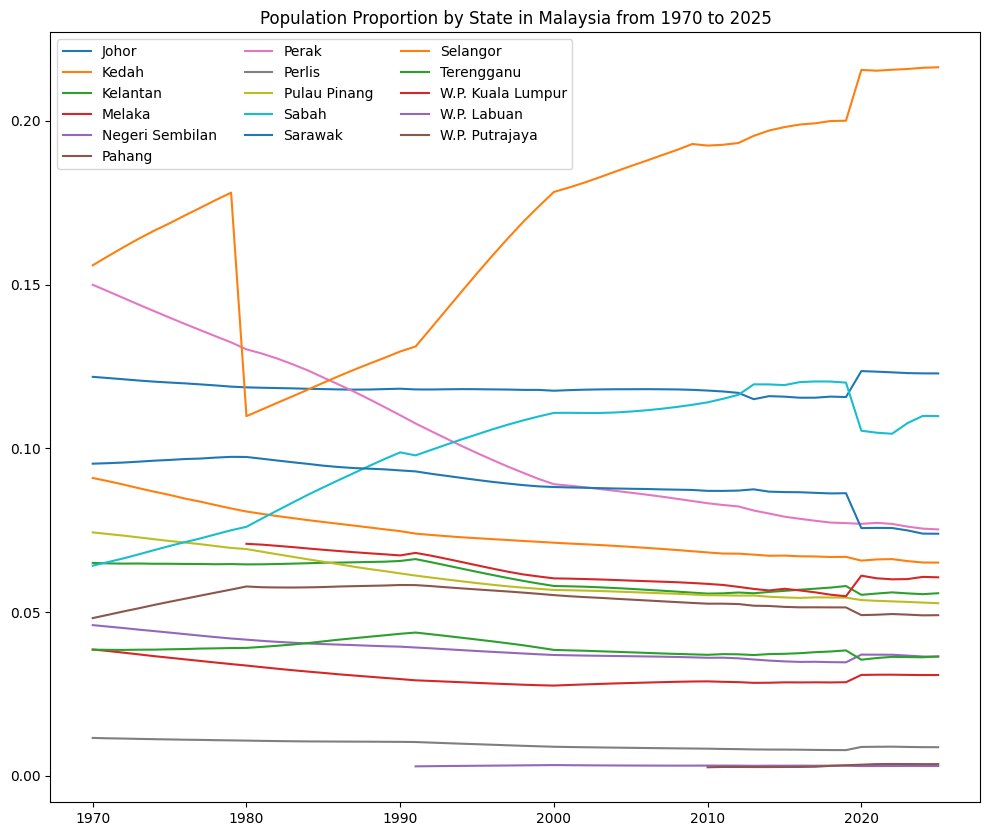

In [20]:
fig, ax = plt.subplots(figsize = (12, 10))

for state in grouped_prop.columns:
    ax.plot(grouped_prop.index, grouped_prop[state], label = state)

ax.set_title("Population Proportion by State in Malaysia from 1970 to 2025")
ax.legend(ncols = 3)
plt.show()

Separation of Kuala Lumpur from Selangor caused huge drop in Selangor proportion

In [24]:
grouped_prop = grouped_prop.T
grouped_prop = grouped_prop.fillna(0)
grouped_prop["Sel_KL_Putra"] = grouped_prop["Selangor"] + grouped_prop["W.P. Kuala Lumpur"] + grouped_prop["W.P. Putrajaya"]
grouped_prop

state,Johor,Kedah,Kelantan,Melaka,Negeri Sembilan,Pahang,Perak,Perlis,Pulau Pinang,Sabah,Sarawak,Selangor,Terengganu,W.P. Kuala Lumpur,W.P. Labuan,W.P. Putrajaya,Sel_KL_Putra
year,,,,,,,,,,,,,,,,,
1970,0.121817,0.090931,0.064998,0.038541,0.045985,0.048135,0.149928,0.011533,0.074307,0.064152,0.095296,0.155892,0.038486,0.000000,0.000000,0.000000,0.155892
1971,0.121456,0.089958,0.064841,0.038075,0.045539,0.049142,0.147935,0.011416,0.073811,0.065244,0.095451,0.158688,0.038442,0.000000,0.000000,0.000000,0.158688
1972,0.121078,0.088914,0.064774,0.037574,0.045091,0.050169,0.145900,0.011336,0.073321,0.066382,0.095644,0.161405,0.038413,0.000000,0.000000,0.000000,0.161405
1973,0.120693,0.087800,0.064805,0.037048,0.044608,0.051136,0.143859,0.011237,0.072774,0.067612,0.095915,0.164030,0.038482,0.000000,0.000000,0.000000,0.164030
1974,0.120356,0.086750,0.064727,0.036505,0.044163,0.052162,0.141879,0.011149,0.072218,0.068902,0.096216,0.166476,0.038496,0.000000,0.000000,0.000000,0.166476
1975,0.120078,0.085762,0.064722,0.036024,0.043706,0.053121,0.139907,0.011073,0.071681,0.070161,0.096437,0.168719,0.038609,0.000000,0.000000,0.000000,0.168719
1976,0.119827,0.084635,0.064672,0.035534,0.043239,0.054051,0.137964,0.010987,0.071210,0.071345,0.096718,0.171138,0.038679,0.000000,0.000000,0.000000,0.171138
1977,0.119517,0.083698,0.064661,0.035044,0.042772,0.054995,0.136081,0.010929,0.070707,0.072459,0.096860,0.173450,0.038826,0.000000,0.000000,0.000000,0.173450
1978,0.119194,0.082642,0.064582,0.034560,0.042325,0.055923,0.134201,0.010848,0.070127,0.073726,0.097157,0.175822,0.038893,0.000000,0.000000,0.000000,0.175822


In [ ]:
sel_kl_putra_data = grouped_prop["Sel_KL_Putra"]
sel_kl_putra_data

year
1970    0.155892
1971    0.158688
1972    0.161405
1973    0.164030
1974    0.166476
1975    0.168719
1976    0.171138
1977    0.173450
1978    0.175822
1979    0.178076
1980    0.180630
1981    0.182417
1982    0.184068
1983    0.185703
1984    0.187322
1985    0.189008
1986    0.190644
1987    0.192245
1988    0.193766
1989    0.195278
1990    0.196835
1991    0.199130
1992    0.203860
1993    0.208524
1994    0.213136
1995    0.217685
1996    0.222104
1997    0.226389
1998    0.230618
1999    0.234659
2000    0.238558
2001    0.239848
2002    0.241229
2003    0.242743
2004    0.244279
2005    0.245778
2006    0.247221
2007    0.248737
2008    0.250199
2009    0.251788
2010    0.253606
2011    0.253622
2012    0.253569
2013    0.255109
2014    0.256267
2015    0.257852
2016    0.258132
2017    0.257987
2018    0.258234
2019    0.258044
2020    0.280014
2021    0.279156
2022    0.279174
2023    0.279452
2024    0.280466
2025    0.280491
Name: Sel_KL_Putra, dtype: float64

<Axes: title={'center': 'Population Proportion in Selangor, KL, and Putrajaya Combined\nfrom 1970 to 2025'}, xlabel='year'>

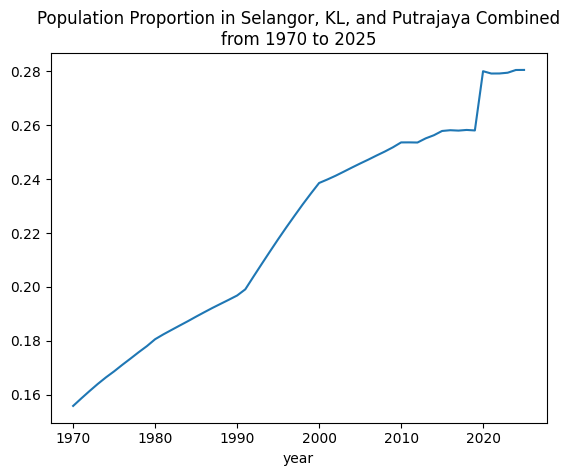

In [ ]:
ax = sel_kl_putra_data.plot(title = "Population Proportion in Selangor, KL, and Putrajaya Combined\n" +
                       "from 1970 to 2025")
plt.figtext(
    0.5, -0.05, 
    "Note 1: In 1980, Kuala Lumpur gained its own census count.\n" + "Note 2: In 2010, Putrajaya gained its own census count.\n" +
    "Note 3: In 1991, Labuan gained its own census" +  
    "Note 4: Due to COVID-19 pandemic, intercensal estimation in 2020 resulted in spikes and losses in 2020 and 2021.\n",
    wrap=True, ha='center', fontsize=9, style='italic'
)

When combined, proportion in Selangor, Kuala Lumpur and Putrajaya increased over the years.

The reverse is quite obvious in Perak

In [ ]:
perak_data = grouped_prop["Perak"]
perak_data

year
1970    0.149928
1971    0.147935
1972    0.145900
1973    0.143859
1974    0.141879
1975    0.139907
1976    0.137964
1977    0.136081
1978    0.134201
1979    0.132346
1980    0.130224
1981    0.128934
1982    0.127417
1983    0.125670
1984    0.123770
1985    0.121609
1986    0.119466
1987    0.117299
1988    0.114959
1989    0.112541
1990    0.110090
1991    0.107580
1992    0.105263
1993    0.102971
1994    0.100707
1995    0.098546
1996    0.096454
1997    0.094413
1998    0.092516
1999    0.090648
2000    0.089028
2001    0.088595
2002    0.088083
2003    0.087551
2004    0.087000
2005    0.086430
2006    0.085850
2007    0.085238
2008    0.084577
2009    0.083888
2010    0.083214
2011    0.082675
2012    0.082244
2013    0.080996
2014    0.080069
2015    0.079103
2016    0.078465
2017    0.077858
2018    0.077311
2019    0.077140
2020    0.076925
2021    0.077228
2022    0.076897
2023    0.076080
2024    0.075455
2025    0.075220
Name: Perak, dtype: float64

<Axes: title={'center': 'Population Proportion in Perak from 1970 to 2025'}, xlabel='year'>

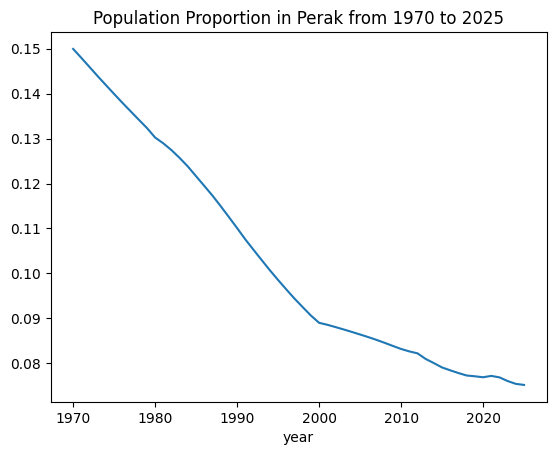

In [ ]:
perak_data.plot(title = "Population Proportion in Perak from 1970 to 2025")